In [1]:
import os
import sys
import numpy as np
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
import difflib
%matplotlib inline

In [2]:
df_cm = pd.read_excel('../carreras_materias.xlsx')

In [3]:
df = pd.read_excel('../tunned_student_data.xlsx')
df = df[(df[df.columns[61:63]] != 0).all(1)]
df.rename(columns=lambda x: x[:30], inplace=True)
# Deleting TRAPECISM row
df.drop(df[(df['carrera'] == 'TRAPECISMO')].index, inplace = True)


df = df.reset_index(drop=True)



df_demographic = df[df.columns[:5]]
df_control_a = df[df.columns[5:8]]
df_control_b = df[df.columns[8:10]]
df_control_d = df[df.columns[10:13]]
df_control_f = df[df.columns[13:23]]

# It seems to belong to another poll
df_demographic_2 = df[df.columns[23:26]]
df_open_answer = df[df.columns[26:29]]
df_control_g = df[df.columns[29:31]]

df_unknown = df[df.columns[31:33]]
df_control_e = df[df.columns[33:36]]
df_x_a = df[df.columns[36:43]]
df_x_b = df[df.columns[43:46]]
df_x_c = df[df.columns[46:52]]
df_x_d = df[df.columns[52:55]]
df_satisfaction = df[df.columns[55:60]]
df_relative_student = df[df.columns[60:]]


## Fixing Carrers column

In [4]:
carreras = df_cm.Carreras
carreras = tuple(carreras[~carreras.isnull()])
asignaturas = list(df_cm.TITULO)

<AxesSubplot:ylabel='carrera'>

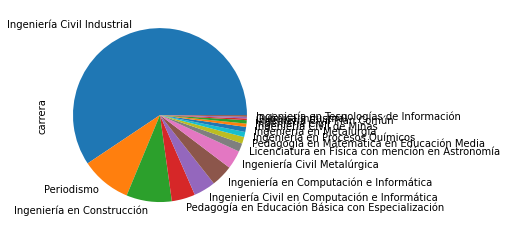

In [5]:
correct_carrer = []
for carrer in df.carrera:
    if 'ici' in carrer.lower():
        carrer = 'Ingeniería Civil Industrial'
    if carrer == 'Pedagogia educacion en basica ' or carrer == 'Pedagogía General Básica ':
        carrer = 'Pedagogía en Educación Básica con Especialización'
    if carrer == 'Lic. Física':
        carrer = 'Licenciatura en Física con mención en Astronomía'
    if carrer=='Ing en computación' or carrer=='ICCI' or carrer=='Civil Informática' or carrer=='Ing. civil informatica':
        carrer = 'Ingeniería Civil en Computación e Informática'
    match = difflib.get_close_matches(carrer.lower(),carreras)
    if match:
        correct_carrer.append(match[0])
df.carrera = correct_carrer
df.carrera.value_counts().plot.pie()

## Fixing Asignatura Column
* The one who put 'Ninguna' refers to all asignaturas

In [6]:
correct_asig = []
for asig in df['nombre de la asignatura']:
    if 'Calculo, semestre 1, paralelo C5' in asig:
        asig = 'Calculo I'
    match = difflib.get_close_matches(asig,asignaturas)
    if match:
        correct_asig.append(match[0])
    else:
        correct_asig.append(asig)
        print(asig)

Gestión integrada de costos tiempo y riesgos 2
Gestión integrada Costos, Riesgos II
integrador III
Documental y Audiovisual
integrador 3
A
Internet of Things
Ninguna 
-


<AxesSubplot:ylabel='nombre de la asignatura'>

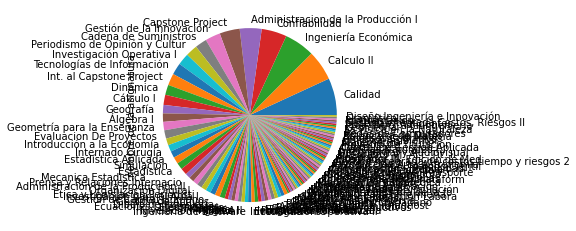

In [7]:
df['nombre de la asignatura'] = correct_asig
df['nombre de la asignatura'].value_counts().plot.pie()

## Separación por semestre

<AxesSubplot:ylabel='¿qué semestre está cursando?'>

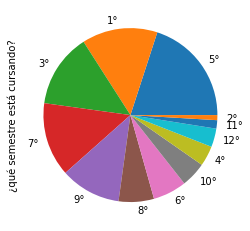

In [8]:
df['¿qué semestre está cursando?'].value_counts().plot.pie()

## Separación por edad

<AxesSubplot:ylabel='indique su edad'>

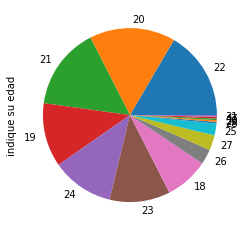

In [9]:
df[df.columns[0]].value_counts().plot.pie()

## Separacion por Genero

<AxesSubplot:ylabel='indique el género con el cual '>

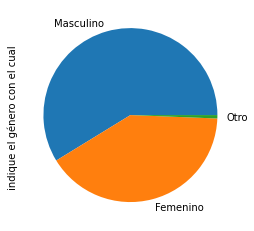

In [10]:
df[df.columns[1]].value_counts().plot.pie()

## Separacion por establecimiento Educacional

<AxesSubplot:ylabel='indique el tipo de establecimi'>

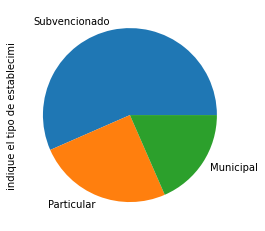

In [11]:
df[df.columns[2]].value_counts().plot.pie()

## Separación por PSU / PDT

<AxesSubplot:ylabel='indique el rango de su puntaje'>

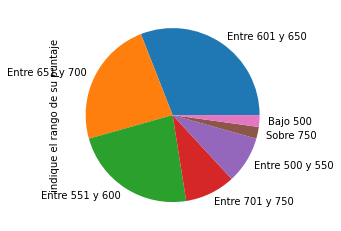

In [12]:
df[df.columns[3]].value_counts().plot.pie()

## Separacion por promedio notas colegio/escuela

<AxesSubplot:ylabel='indique el rango en el que se '>

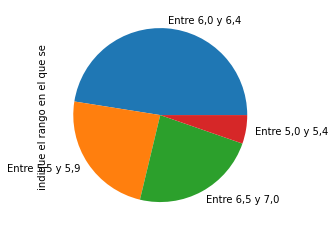

In [13]:
df[df.columns[4]].value_counts().plot.pie()

In [14]:
cleanup_nums = {"comparado con otros estudiante":     {"Mejor": 1, "Peor": 0},
                "mi nota final del curso, ¿en q": {"Dentro de las más altas del curso.": 5, 
                                                   "En el promedio.": 3, 
                                                   "Levemente sobre el promedio.": 4, 
                                                   "Levemente bajo el promedio.": 2,
                                                   "Dentro de las notas más bajas del curso.": 1}}

In [15]:
df = df.replace(cleanup_nums)
df.head()

,indique su edad,indique el género con el cual,indique el tipo de establecimi,indique el rango de su puntaje,indique el rango en el que se,puedo comprender en profundida,puedo manejar los contenidos i,puedo hacer un excelente traba,comparado con otros estudiante,"del 1 al 5, en una escala de m",...,el (la) profesor(a) ofreció nu,disfruté siendo un(a) estudian,este curso cumplió mis expecta,adquirí herramientas para el d,estoy satisfecho(a) con la edu,logré los resultados de aprend,la carga de este curso fue muy,este curso fue muy complejo,este es/fue un curso muy relev,"mi nota final del curso, ¿en q"
0,24,Masculino,Subvencionado,Entre 701 y 750,"Entre 6,5 y 7,0",4,5,4,1,5,...,4,4,4,5,5,4,1,2,5,5
1,23,Femenino,Subvencionado,Entre 651 y 700,"Entre 6,0 y 6,4",3,3,3,0,3,...,4,3,4,4,4,4,4,3,4,3
2,25,Masculino,Subvencionado,Entre 651 y 700,"Entre 6,0 y 6,4",4,5,4,1,5,...,5,5,4,5,5,5,2,2,5,3
3,23,Masculino,Subvencionado,Entre 601 y 650,"Entre 6,0 y 6,4",4,3,4,0,4,...,4,5,5,5,5,5,3,3,3,3
4,23,Masculino,Subvencionado,Entre 651 y 700,"Entre 6,5 y 7,0",4,4,4,1,5,...,4,5,5,5,5,5,4,3,5,4


In [16]:
difflib.get_close_matches('administracion producción II',asignaturas)

['Administracion de la Producción II',
 'Administracion de la Producción I',
 'Administracion Financiera']

In [17]:
import os
module_path = os.path.abspath(os.path.join('..'))
if not os.path.isfile(module_path + '/data_to_model.xlsx'):
    df.to_excel(r'../data_to_model.xlsx', index = False)